## Setup

In [1]:
import os
import shutil
from google.colab import files
from pathlib import Path
import imghdr

In [2]:
!git clone https://github.com/omerbt/Splice.git

Cloning into 'Splice'...
remote: Enumerating objects: 1348, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 1348 (delta 14), reused 25 (delta 14), pack-reused 1321
Receiving objects: 100% (1348/1348), 210.23 MiB | 23.08 MiB/s, done.
Resolving deltas: 100% (88/88), done.


In [3]:
#@title Create/Reset Dataroot

os.chdir("/content/Splice")

DATAROOT = "./datasets/curr_pair"
path_dataroot = Path(DATAROOT)
if os.path.exists(path_dataroot):
  shutil.rmtree(path_dataroot)
path_A = Path(f"{DATAROOT}/A")
path_B = Path(f"{DATAROOT}/B")
path_A.mkdir(parents=True, exist_ok=True)
path_B.mkdir(parents=True, exist_ok=True)

In [4]:
#@title Create Utils
from IPython.display import display
from torchvision.transforms import Resize
from PIL import Image


def display_image(img):
  w, h = img.size
  if max(w, h) > 480:
    img = Resize(480, max_size=481)(img)
  display(img)


def process_upload(uploaded, data_path):
  if len(uploaded.keys()) > 1:
    clear_output(wait=True)
    for fn in uploaded.keys():
      os.remove(fn)
    print("Please choose 1 file!")
  else:
    fn = list(uploaded.keys())[0]
    if imghdr.what(fn) is None:
      clear_output(wait=True)
      print("Please upload a valid image file")
      os.remove(fn)
    else:
      dest_path = f"{data_path}/{fn}"
      shutil.move(fn, dest_path)
      clear_output(wait=True)
      print("Image successfully uploaded:")
      uploaded_image = Image.open(dest_path)
      display_image(uploaded_image)

Image successfully uploaded:


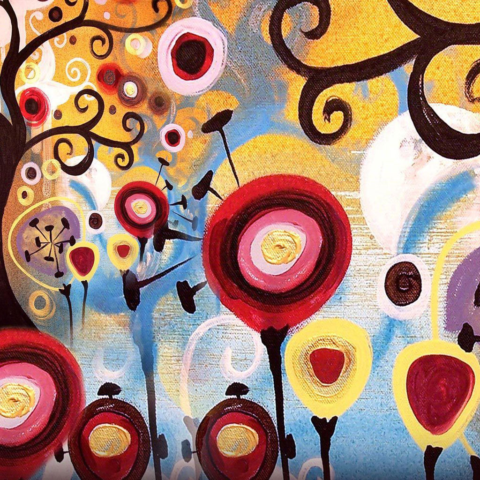

In [5]:
#@title Upload Source Structure Image
from IPython.display import clear_output

shutil.rmtree(path_A)
path_A.mkdir(parents=True)
uploaded = files.upload()
process_upload(uploaded, f"{DATAROOT}/A")

Image successfully uploaded:


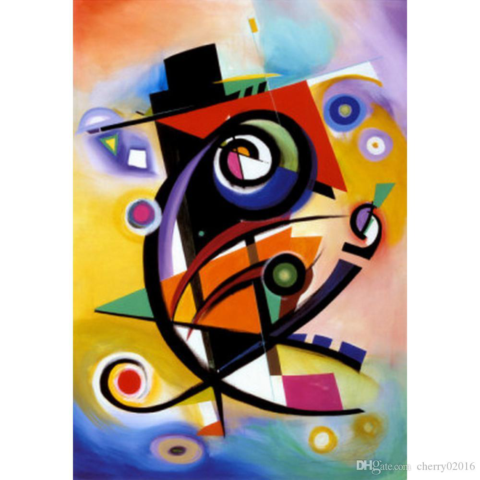

In [6]:
#@title Upload Target Appearance Image
shutil.rmtree(path_B)
path_B.mkdir(parents=True)
uploaded = files.upload()
process_upload(uploaded, f"{DATAROOT}/B")

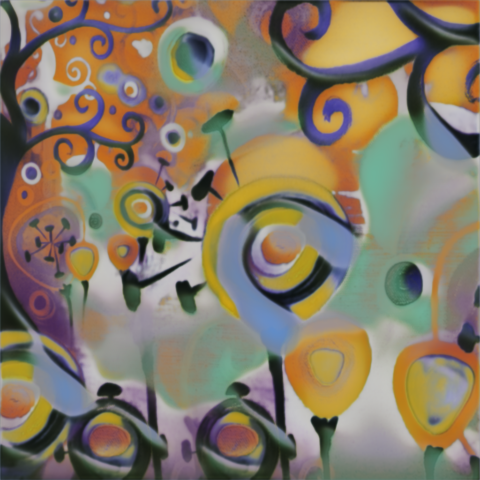

Epoch 975:  10%|▉         | 975/10000 [18:57<2:53:09,  1.15s/it, loss=0.372, lr=0.002]

In [ ]:
#@title Perform Splicing

from train import train_model
from torchvision.transforms import ToPILImage, Resize

def show_result(out_img):
  clear_output(wait=True)
  img = ToPILImage()(out_img)
  display_image(img)


train_model(DATAROOT, show_result)